### Which vendors contribute the most total purchase dollars ?

In [27]:
vendor_perfomance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProffit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [28]:
# Calculate total purchase for all vendors
total_purchase = vendor_perfomance['TotalPurchaseDollars'].sum()

In [29]:
# Compute each vendor's contribution to total purchase
vendor_perfomance['PurchaseContribution%'] = vendor_perfomance['TotalPurchaseDollars'] / total_purchase

In [30]:
vendor_perfomance = vendor_perfomance.round(2)

In [31]:
vendor_performance = round(vendor_perfomance.sort_values('PurchaseContribution%', ascending = False), 2)


In [32]:
# Sort by contribution
vendor_performance = round(vendor_perfomance.sort_values('PurchaseContribution%', ascending=False), 2)

# Pick top 10 vendors
top_vendors = vendor_performance.head(10)

# Format dollar columns
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProffit'] = top_vendors['GrossProffit'].apply(format_dollars)

# Convert contribution to percentage (without % sign)
top_vendors['PurchaseContribution%'] = top_vendors['PurchaseContribution%'].apply(lambda x: round(x * 100, 2))

# Show table
top_vendors



,VendorName,TotalPurchaseDollars,GrossProffit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.0
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,8.0
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.0
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,8.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,6.0
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,5.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,4.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.0
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,4.0
61,MOET HENNESSY USA INC,9.25M,4.11M,13.36M,3.0


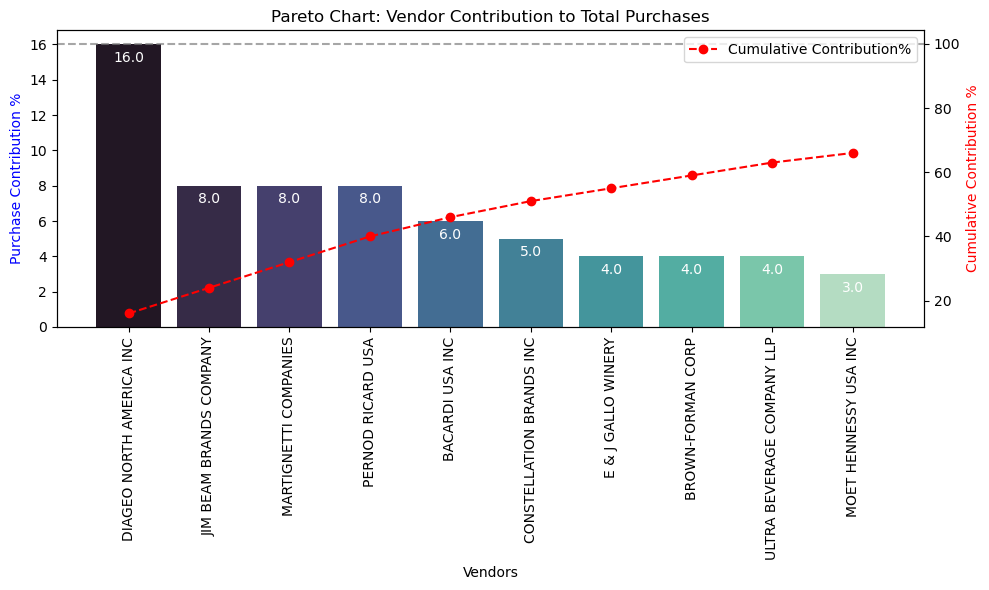

In [33]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], 
            y=top_vendors['PurchaseContribution%'], 
            palette="mako", 
            ax=ax1)

# Add value labels on bars (formatted to 1 decimal place, no % sign)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, f"{value:.1f}", ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], 
         top_vendors['Cumulative_Contribution%'], 
         color='red', marker='o', linestyle='dashed', label='Cumulative Contribution%')

# Labels and styling
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Optional horizontal line at 100%
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### How Much of total procurement is dependent on top vendors ?

In [34]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)} %")


Total Purchase Contribution of top 10 vendors is 66.0 %


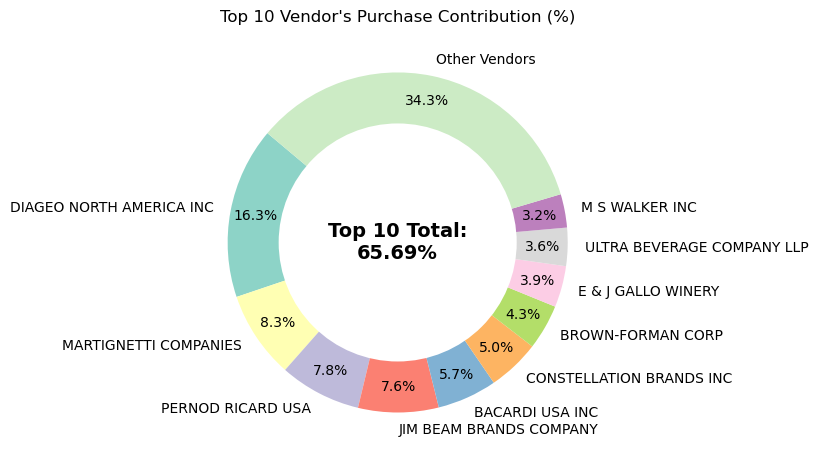

In [35]:
# Step 1: Calculate total purchase from all vendors
total_purchase_all = vendor_performance['TotalPurchaseDollars'].sum()

# Step 2: Get top 10 vendors by purchase amount
top_vendors = vendor_performance.nlargest(10, 'TotalPurchaseDollars').copy()

# Step 3: Calculate each vendor's contribution percentage (out of all vendors)
top_vendors['Purchase_Contribution%'] = (top_vendors['TotalPurchaseDollars'] / total_purchase_all) * 100

# Step 4: Add "Other Vendors" slice
total_top_10_contribution = top_vendors['Purchase_Contribution%'].sum()
remaining_contribution = 100 - total_top_10_contribution

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Step 5: Plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Set3.colors  # Change palette if needed
)

# Add white center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total annotation in center
plt.text(0, 0, f"Top 10 Total:\n{total_top_10_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.tight_layout()
plt.show()


### Does purcahsing in Bulk reduce the unit price and what is the optimal purchase volume for cost savings ?

In [36]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [37]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [38]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

- The price difference between Small and Large orders is substantial (~72% reduction in unit cost).

- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [40]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print(f'Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [41]:
# Aggregate Capital Locked Per Vendor
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K
